In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import squarify

plt.style.use('fivethirtyeight')

d2coding_path = 'D2Coding/D2Coding-Ver1.3.2-20180524.ttf' # 폰트 경로
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
file_path = '../dataset/전국교통사고다발지역표준데이터.csv'
data_ori = pd.read_csv(file_path, encoding='EUC-KR')
data_ori.columns

Index(['사고지역관리번호', '사고연도', '사고유형구분', '위치코드', '사고다발지역시도시군구', '사고지역위치명', '사고건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [3]:
data_pick = data_ori[['사고연도', '사고유형구분', '사고다발지역시도시군구', '사고지역위치명', '사고건수', '위도', '경도', '사고다발지역폴리곤정보']]
data_pick.head()

,사고연도,사고유형구분,사고다발지역시도시군구,사고지역위치명,사고건수,위도,경도,사고다발지역폴리곤정보
0,2020,무단횡단,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6..."
1,2020,무단횡단,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7..."
2,2020,무단횡단,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8..."
3,2020,무단횡단,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8..."
4,2020,무단횡단,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8..."


In [4]:
data_pick.columns = ['year', 'type', 'region', 'street', 'accidents', 'lat', 'lon', 'polygon']

In [5]:
data_pick = data_pick.copy() # 컬럼명 영어로 변경 후 깊은 복사가 필요함
data_pick

,year,type,region,street,accidents,lat,lon,polygon
0,2020,무단횡단,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6..."
1,2020,무단횡단,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7..."
2,2020,무단횡단,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8..."
3,2020,무단횡단,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8..."
4,2020,무단횡단,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8..."
...,...,...,...,...,...,...,...,...
14473,2014,자전거,서울특별시 송파구10,서울특별시 송파구 거여동(마천사거리 부근),8,37.497152,127.146265,"{type:Polygon,coordinates:[[[127.1478646,37.49..."
14474,2014,자전거,서울특별시 송파구11,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근),7,37.514094,127.099354,"{type:Polygon,coordinates:[[[127.1009533,37.51..."
14475,2014,자전거,서울특별시 송파구12,서울특별시 송파구 삼전동(신양빌라 부근),7,37.501233,127.085015,"{type:Polygon,coordinates:[[[127.0866148,37.50..."
14476,2014,자전거,서울특별시 송파구13,서울특별시 송파구 가락동(문정시영아파트 부근),7,37.492374,127.136029,"{type:Polygon,coordinates:[[[127.1376285,37.49..."


In [6]:
data_pick['region'] = data_pick['region'].str.replace(r'\d+', '', regex = 1)
data_gr_type = data_pick.groupby('type')['accidents'].sum().reset_index(name='count')
data_gr_type = data_gr_type.sort_values(['count'], ascending = 0)
data_gr_type

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


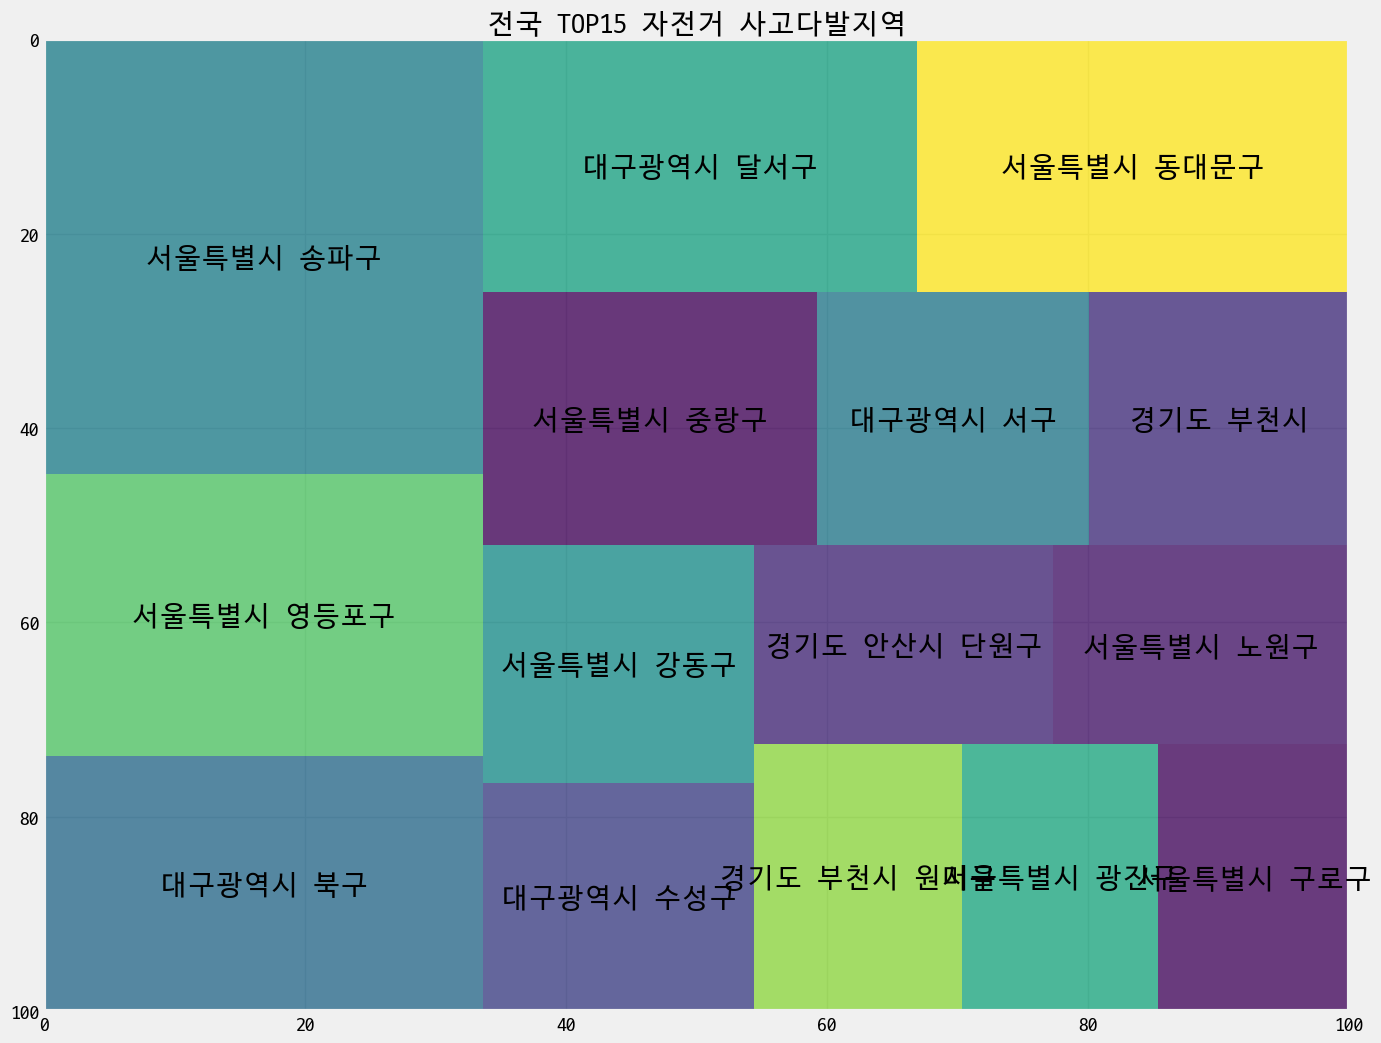

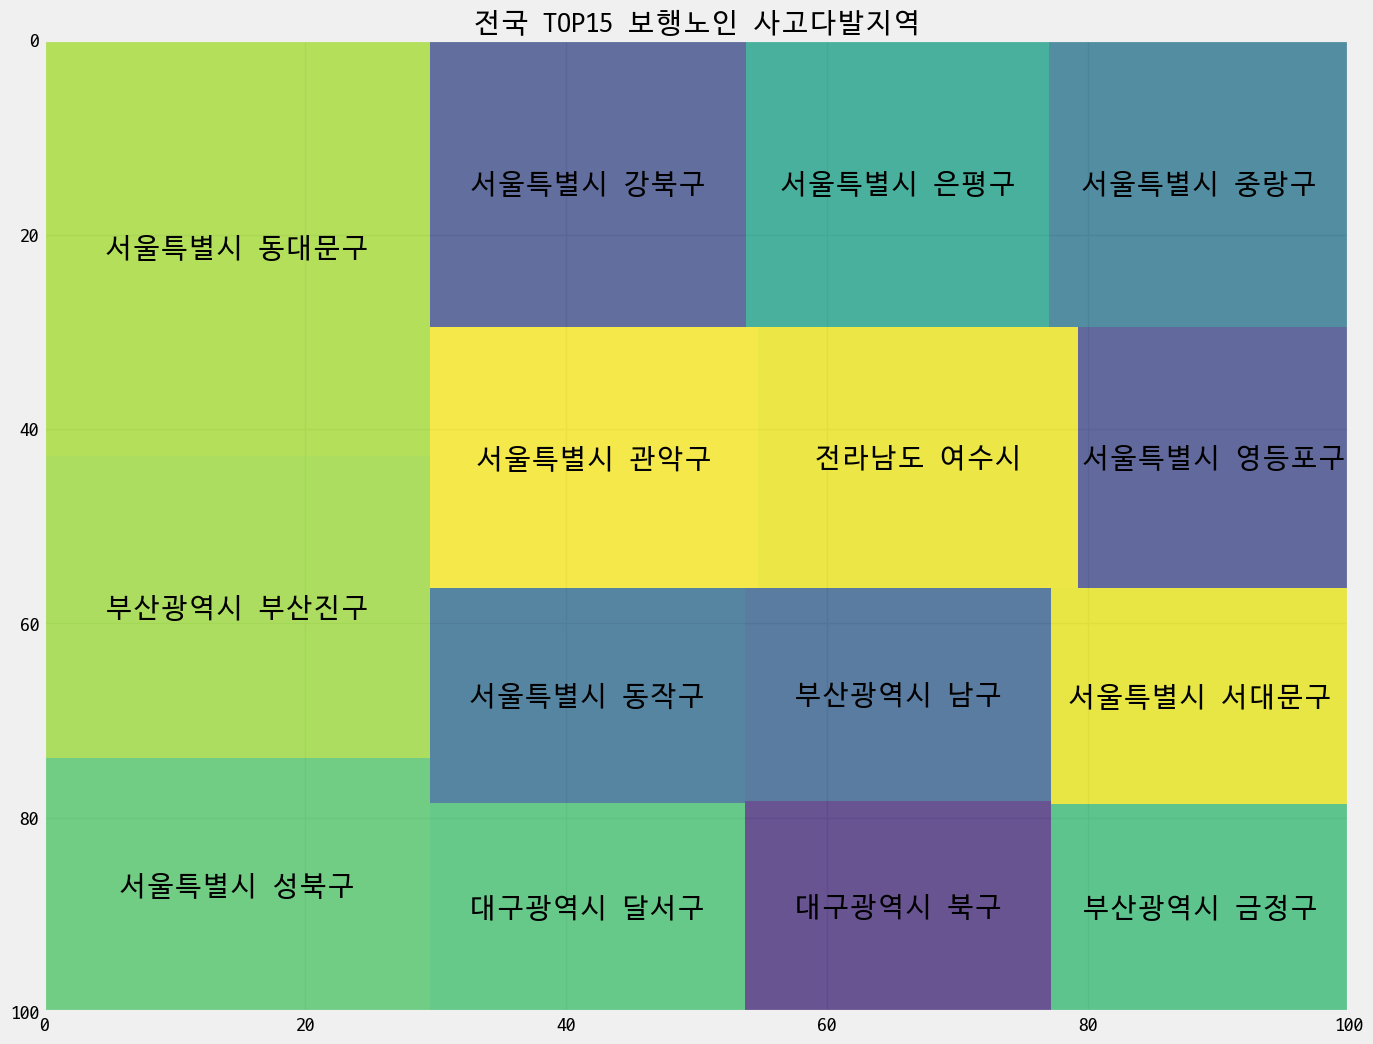

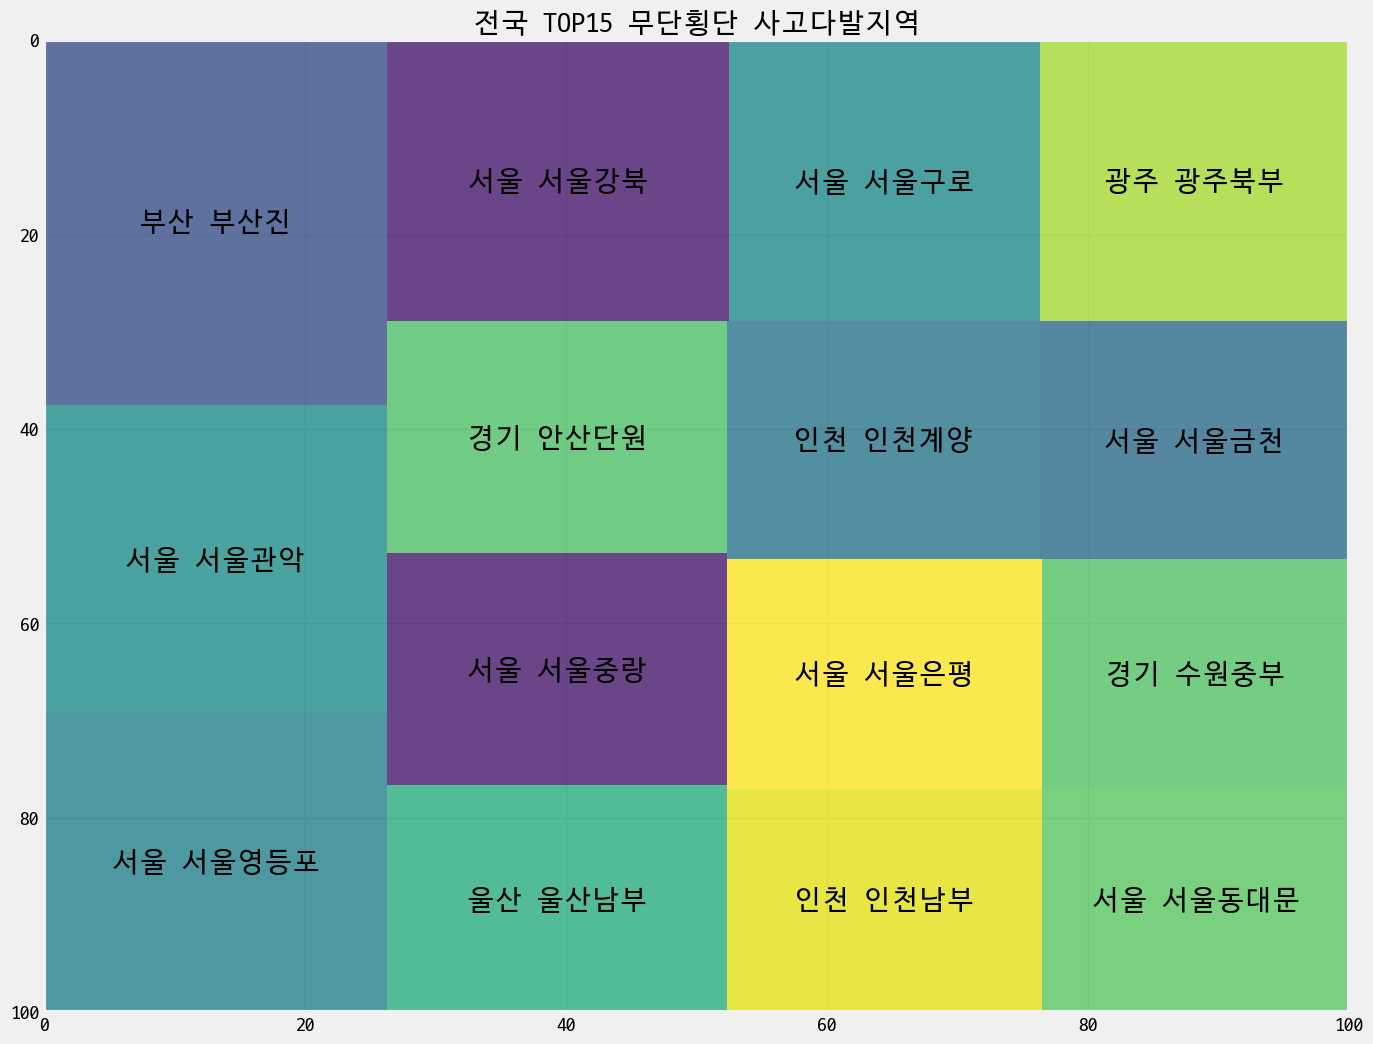

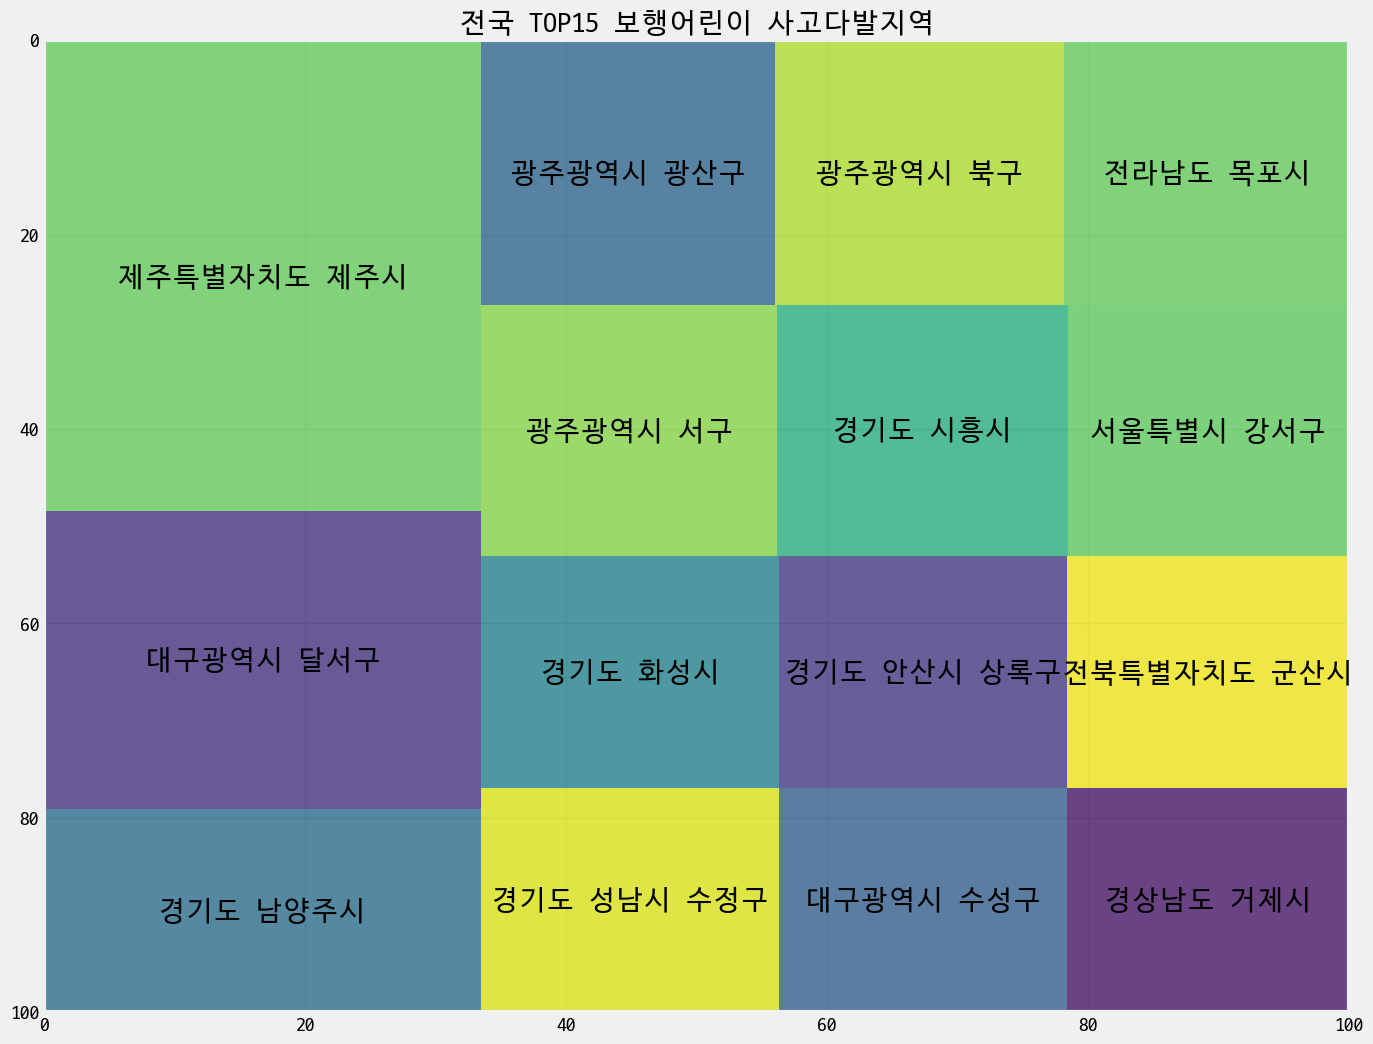

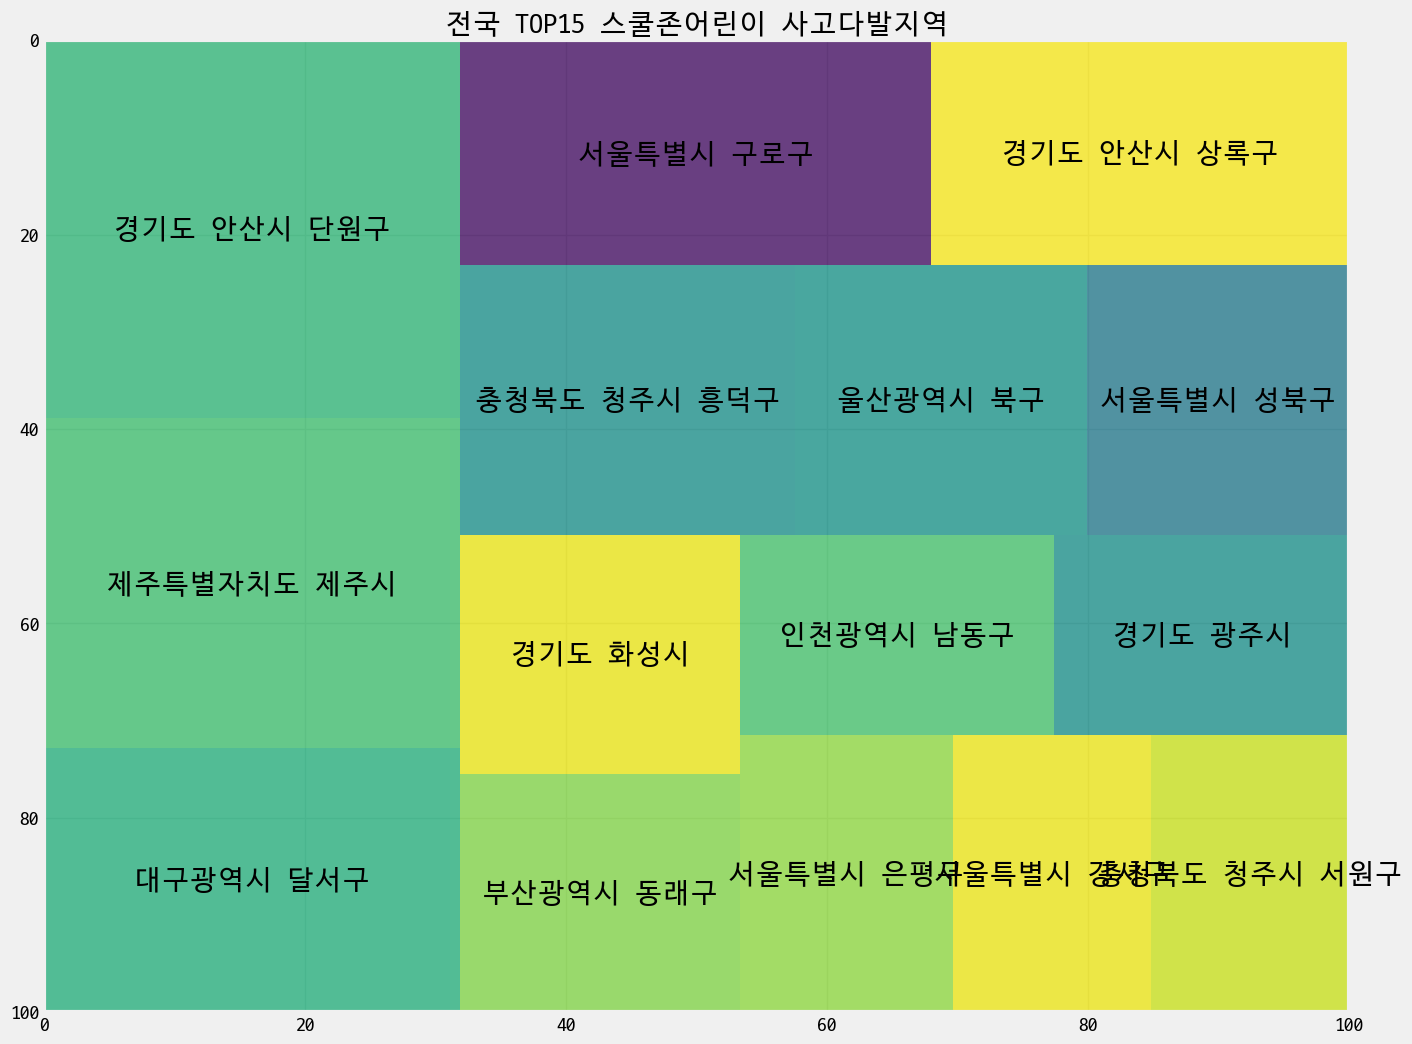

In [7]:
data_map = data_pick.copy()
title_array = data_gr_type['type']

for t in title_array:    
    mtab = data_map[data_map['type'] == t].groupby('region')['accidents'].sum().reset_index(name='count').sort_values(['count'], ascending = 0).head(15)
    plt.figure(figsize=(15,12))
    squarify.plot(
        sizes = mtab['count'],
        label = mtab['region'],
        alpha = 0.8,
        text_kwargs = {'fontsize' : 20}
    )
    plt.title(f'전국 TOP15 {t} 사고다발지역')
    plt.gca().invert_yaxis()
    plt.show()

In [8]:
# !pip install folium

In [9]:
import folium
import json
from IPython.display import display
import re

In [10]:
pick = data_pick.copy()
print(pick)

       year  type     region                              street  accidents  \
0      2020  무단횡단    충북 청주흥덕           충청북도 청주시 흥덕구 봉명동(은파교회 부근)          4   
1      2020  무단횡단      충남 서산               충청남도 서산시 석림동(하트리움 부근)          5   
2      2020  무단횡단    충남 천안서북      충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근)          5   
3      2020  무단횡단    충남 천안서북           충청남도 천안시 서북구 성정동(LG천막 부근)          5   
4      2020  무단횡단    충남 천안서북           충청남도 천안시 서북구 두정동(플라리안 부근)          4   
...     ...   ...        ...                                 ...        ...   
14473  2014   자전거  서울특별시 송파구             서울특별시 송파구 거여동(마천사거리 부근)          8   
14474  2014   자전거  서울특별시 송파구  서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근)          7   
14475  2014   자전거  서울특별시 송파구              서울특별시 송파구 삼전동(신양빌라 부근)          7   
14476  2014   자전거  서울특별시 송파구           서울특별시 송파구 가락동(문정시영아파트 부근)          7   
14477  2014   자전거  서울특별시 송파구             서울특별시 송파구 풍납동(천호사거리 부근)          6   

             lat         lon  \
0      36.650390  1

In [11]:
arr = []
for el in pick['polygon']:
    geojson = el
    # json 형태의 문자열로 변환
    geojson = re.compile(r'([a-zA-Z]+)').sub(r'"\1"', geojson.replace("'", '"'))
    # print(geojson)
    json_data = json.loads(geojson)
    coordin = json_data['coordinates']
    coordin[0] = [[lat, lon] for lon, lat in coordin[0]]
    arr.append(coordin)
# print(len(arr))

In [12]:
m = folium.Map(location=arr[0][0][0], zoom_start=12)
display(m)

In [ ]:
for co in arr:
    folium.Polygon(
        locations = co,
        color = 'red',
        weight = 4,
        fill = True,
        fill_color = 'blue'
    ).add_to(m)
display(m)

In [14]:
m.save('map.html')